In [1]:
import networkx as nx;
import matplotlib as mp;
import matplotlib.pyplot as plt;
from ipywidgets import *

We first define a small network based on a link list. For simplicity, let's make sure that all nodes have at least one out-link.

In [2]:
edge_list = [(0,1),(2,0),(0,3),(1,2),(1,4),(1,5),(5,4),(4,3),(3,1),(5,3)];
test_graph = nx.DiGraph();
for edge in edge_list:
    test_graph.add_edge(edge[0],edge[1]);

First we just prepare a layout using networkx.

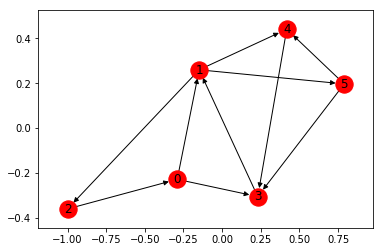

In [3]:
pos_list = nx.spring_layout(test_graph);
nx.draw_networkx(test_graph,pos=pos_list)
plt.show();

OK, now we can define a function that implements the iterative calculation of PageRank shown in the slides. The results at each iteration are stored in a dictionary, and this is returned by the function.

In [4]:
def Page_rank_iterate(directed_net,damping_factor,max_num_steps):
    _pr_vals = {_node : 1.0/directed_net.number_of_nodes() for _node in directed_net.nodes()};
    _pr_dict = {};
    _pr_dict.clear();
    _pr_dict[int(0)] = _pr_vals;
    for _step in range(1,max_num_steps+1):
        _new_pr_vals = {};
        _new_pr_vals.clear();
        for _node in directed_net.nodes:            
            _sum = sum([_pr_vals[_in_link[0]]/directed_net.out_degree(_in_link[0]) for _in_link in directed_net.in_edges(_node)]);
            _new_pr_vals[_node] = _sum*(1.0-damping_factor)+damping_factor/directed_net.number_of_nodes();
        _sum_new_pr = sum(_new_pr_vals.values());
        for _node in _new_pr_vals:
            _new_pr_vals[_node] = _new_pr_vals[_node]/_sum_new_pr;
        _pr_dict[_step] = _new_pr_vals;
        _pr_vals = dict(_new_pr_vals);
    return _pr_dict;

In [5]:
test_pr_dict = Page_rank_iterate(test_graph,0.15,30);

Let's print out the results for the first two and the last two steps.

In [6]:
print(test_pr_dict[0]);
print(test_pr_dict[1]);
print(test_pr_dict[28]);
print(test_pr_dict[29]);

{0: 0.16666666666666666, 1: 0.16666666666666666, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.16666666666666666, 5: 0.16666666666666666}
{0: 0.16666666666666666, 1: 0.2375, 2: 0.07222222222222222, 3: 0.30833333333333335, 4: 0.14305555555555555, 5: 0.07222222222222222}
{0: 0.11411416821122143, 1: 0.28179399974385383, 2: 0.10482670874176878, 3: 0.2450546217140078, 4: 0.1493837928473795, 5: 0.10482670874176878}
{0: 0.11410270243050345, 1: 0.28179494994667575, 2: 0.10484163326075857, 3: 0.24502609662529337, 4: 0.14939298447601032, 5: 0.10484163326075857}


Now let's define a function that can color the nodes in the layout and also replace the node labels with the current value of the PageRank at a given step in the iteration. By using this function we can create an interactive 'widget' showing the evolution of the calculated PageRank during the iterations.

In [7]:
def Plot_nets(graph,pos_vec,color_dict,label_dict,step):
    _color_list = color_dict[step];
    _labels = label_dict[step];
    nx.draw_networkx(graph,pos=pos_vec,labels=_labels,node_color=_color_list);
    plt.show();

We just prepare the node labels and node colors based on the results obtained before:

In [8]:
max_pr = max( [max(test_pr_dict[step].values()) for step in test_pr_dict]);
pr_color_dict,pr_label_dict = {},{};
pr_color_dict.clear();
pr_label_dict.clear();
for step in test_pr_dict:
    pr_color_dict[step] = [plt.cm.coolwarm(test_pr_dict[step][node]/max_pr) for node in test_pr_dict[step]];
    pr_label_dict[step] = {node: '%.3f' % test_pr_dict[step][node] for node in test_pr_dict[step]};

And finally, the interactive plot with a slider:

In [9]:
interact(Plot_nets,graph = fixed(test_graph), pos_vec=fixed(pos_list),color_dict=fixed(pr_color_dict),
        label_dict=fixed(pr_label_dict),step = IntSlider(min = 0, max = len(pr_color_dict)-1, step = 1, value =0,
                                            description = "step"))

interactive(children=(IntSlider(value=0, description='step', max=30), Output()), _dom_classes=('widget-interac…

<function __main__.Plot_nets(graph, pos_vec, color_dict, label_dict, step)>

Let's compare the results given by the built in Page Rank calculator of networkx. (Note that the damping factor in the slides and in our functions above is corresponding to one minus alpha in the networkx Page Rank function).

In [10]:
pr_nx = nx.pagerank(test_graph,alpha=0.85);
for node in pr_nx:
    print(node,' : nx. page rank:',pr_nx[node],', iter. page rank:',test_pr_dict[len(test_pr_dict)-1][node]);

0  : nx. page rank: 0.11411210182360779 , iter. page rank: 0.11411538827164479
1  : nx. page rank: 0.281781072128117 , iter. page rank: 0.28176583066446337
2  : nx. page rank: 0.10483723028332995 , iter. page rank: 0.10484190248489147
3  : nx. page rank: 0.24503908428648125 , iter. page rank: 0.24503537947339513
4  : nx. page rank: 0.14939328119513384 , iter. page rank: 0.1493995966207139
5  : nx. page rank: 0.10483723028332995 , iter. page rank: 0.10484190248489147
